In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas
import pynbody as pb
import holoviews as hv

import os
import re
import glob 
from tqdm.notebook import tqdm

# Error count

<BarContainer object of 2 artists>

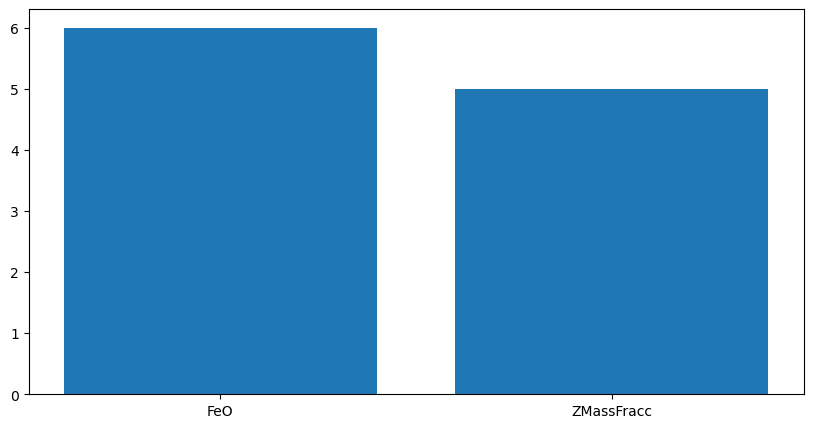

In [2]:
def get_files_with_error(path=str):
    files_with_error = []
    for file in glob.glob(path):
        if re.search(r'error', file):
            files_with_error.append(file)
        errors = [re.search(r'_(.*)_' , s).group(1) for s in files_with_error]
        faceon_error = [s for s in files_with_error if (re.search(r'_(.*)_' , s).group(1)=='faceon')]
        
    return errors, faceon_error

errors, faceon_error = get_files_with_error('../../data/observables/*')
error_name, count = np.unique(errors, return_counts=True)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.bar(error_name, count)


# Preprocess

## Masses and Number of stars

In [3]:
directory = '../../data/parameters/'

Galaxy_Mass = []
Number_Star = []
for galaxy in tqdm(os.listdir(directory)):
    if not("error" in galaxy): 
        path = directory + galaxy 
        mass = np.load(path)['star_mass']
        number_star = len(np.load(path.replace('parameters', 'observables'))['feh'])
        Galaxy_Mass.append(float(mass))    
        Number_Star.append(number_star)
        
Galaxy_Mass = np.array(Galaxy_Mass)
Number_Star = np.array(Number_Star) 
np.save(file='../../data/preprocessing/Galaxy_Mass.npy', arr=Galaxy_Mass)
np.save(file='../../data/preprocessing/Number_Star.npy', arr=Number_Star)

  0%|          | 0/5968 [00:00<?, ?it/s]

In [5]:
Galaxy_Mass = np.load('../../data/preprocessing/Galaxy_Mass.npy')
Number_Star = np.load('../../data/preprocessing/Number_Star.npy')

Text(0.5, 0, 'log10(Number of Star)')

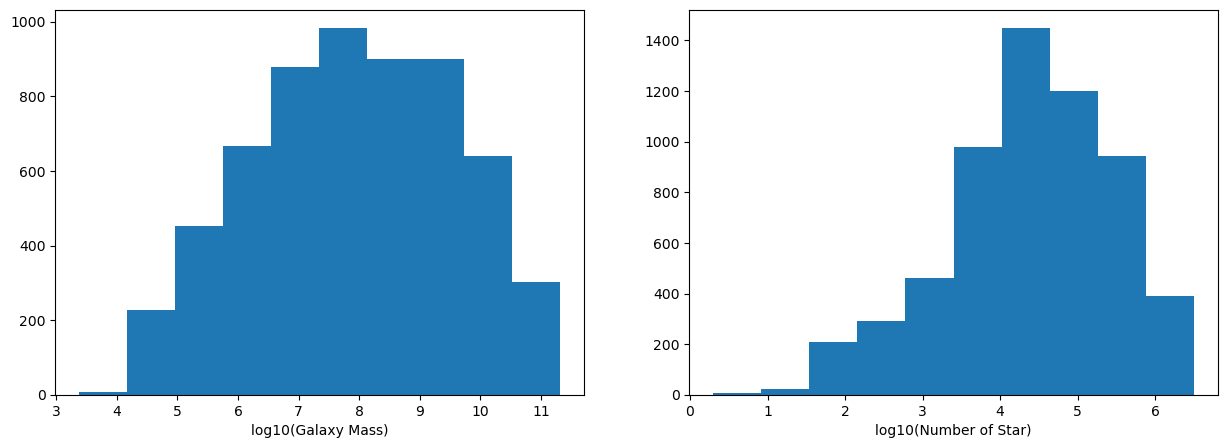

In [6]:
fig = plt.figure(figsize=(15, 5))  
ax = fig.add_subplot(121)
ax.hist(np.log10(Galaxy_Mass))
ax.set_xlabel('log10(Galaxy Mass)')

ax = fig.add_subplot(122)
ax.hist(np.log10(Number_Star))
ax.set_xlabel('log10(Number of Star)')

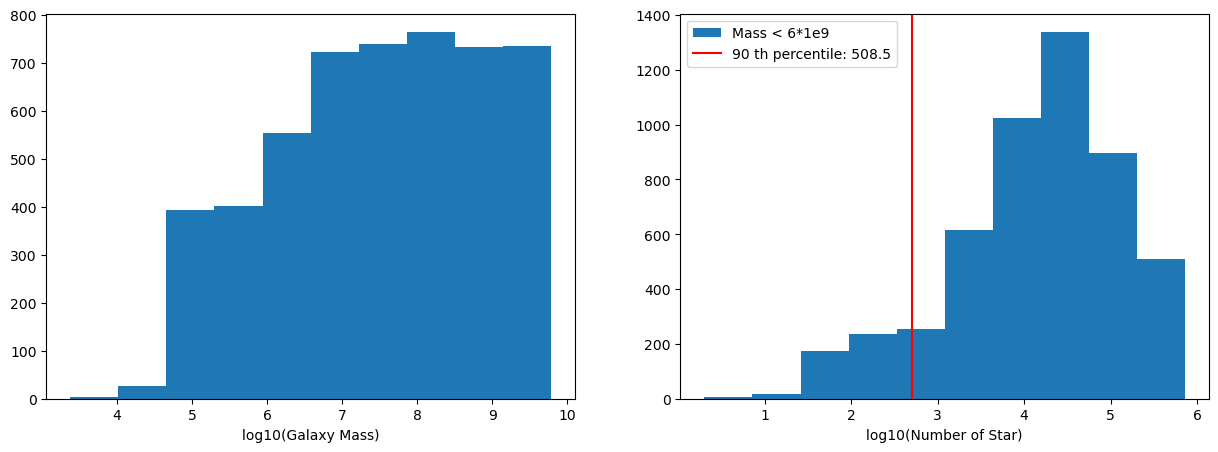

In [31]:
cut_Mass = np.array(Galaxy_Mass)[Galaxy_Mass<6*1e9]
Number_Star_cutMass = np.array(Number_Star)[Galaxy_Mass<6*1e9]

fig = plt.figure(figsize=(15, 5))  
ax = fig.add_subplot(121)
ax.hist(np.log10(cut_Mass))
ax.set_xlabel('log10(Galaxy Mass)')

ax = fig.add_subplot(122)
ax.hist(np.log10(Number_Star_cutMass), label='Mass < 6*1e9')
percentile = np.percentile(Number_Star_cutMass, 10)
ax.axvline(np.log10(percentile), color='r', label=f'90 th percentile: {percentile:.1f}')
ax.set_xlabel('log10(Number of Star)')
ax.legend()

Text(0.5, 0, 'log10(Number of Star)')

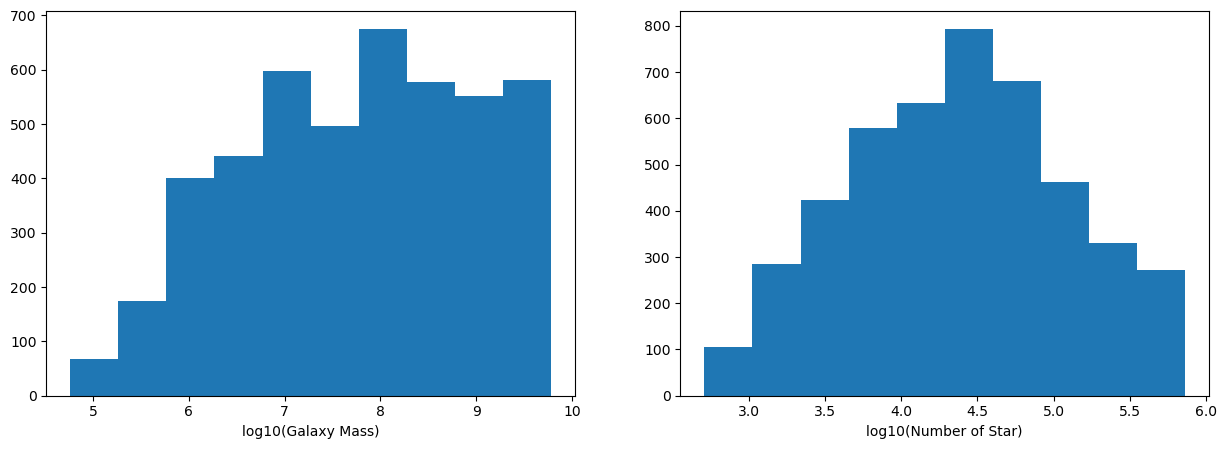

In [60]:
percentile = np.percentile(Number_Star_cutMass, 10)
Preprocess_Number_Star = Number_Star_cutMass[Number_Star_cutMass>percentile]
Preprocess_Galaxy_Mass = cut_Mass[Number_Star_cutMass>percentile]

fig = plt.figure(figsize=(15, 5))   
ax = fig.add_subplot(121)
ax.hist(np.log10(Preprocess_Galaxy_Mass))
ax.set_xlabel('log10(Galaxy Mass)')

ax = fig.add_subplot(122)
ax.hist(np.log10(Preprocess_Number_Star))
ax.set_xlabel('log10(Number of Star)')

In [63]:
a  = np.log10(Preprocess_Number_Star.sum())

8.538240738809497

## FeH and OFe

In [ ]:
# directory = '../../data/observables/'

# FeH = []
# OFe = []
# for galaxy in tqdm(os.listdir(directory)):
#     if not("error" in galaxy): 
#         path = directory + galaxy 
#         feh = np.load(path)['feh']
#         ofe = np.load(path)['ofe']
#         for f, o in zip(feh, ofe):            
#             FeH.append(f)    
#             OFe.append(o)
# np.save(file='../../data/preprocessing/FeH.npy', arr=FeH)
# np.save(file='../../data/preprocessing/OFe.npy', arr=OFe)

  0%|          | 0/5968 [00:00<?, ?it/s]

In [33]:
FeH = np.load('../../data/preprocessing/FeH.npy')
OFe = np.load('../../data/preprocessing/OFe.npy')

Text(0.5, 0, '[O/Fe]')

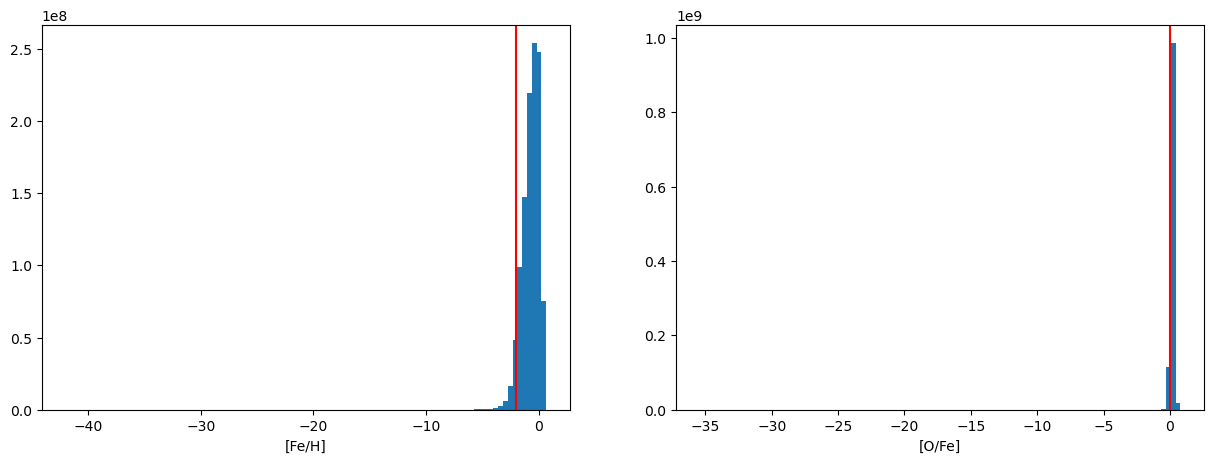

In [56]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
ax.hist(FeH, bins=100)
percentile = np.percentile(FeH, 5)
ax.axvline(percentile, color='r', label=f'5 th percentile: {percentile:.1f}')
ax.set_xlabel('[Fe/H]')

ax = fig.add_subplot(122)   
ax.hist(OFe, bins=100)
percentile = np.percentile(OFe, 5)
ax.axvline(percentile, color='r', label=f'5 th percentile: {percentile:.1f}')
ax.set_xlabel('[O/Fe]')

Feh percentile:
99.9th percentile:-6.01 99th percentile:-2.82 95th percentile:-2.03
OFe percentile:
99.9th percentile:-0.41 99th percentile:-0.16 95th percentile:0.01


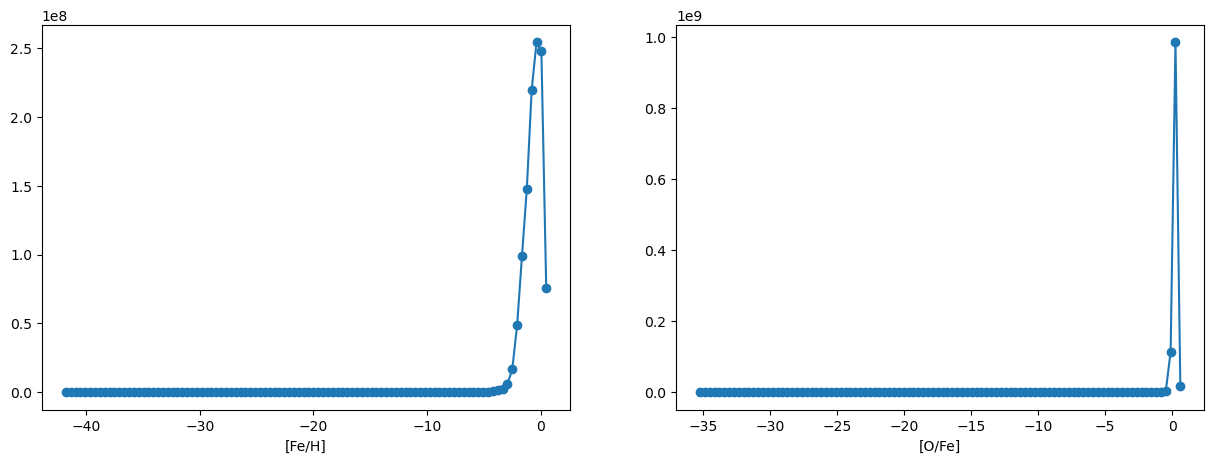

In [54]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
frequencies, edges = np.histogram(FeH, 100)
ax.plot((edges[1:]+edges[:-1])/2, frequencies, 'o-')
ax.set_xlabel('[Fe/H]')

ax = fig.add_subplot(122)
frequencies, edges = np.histogram(OFe, 100)
ax.plot((edges[1:]+edges[:-1])/2, frequencies, 'o-')
ax.set_xlabel('[O/Fe]')

Feh_percentile_99_9, Feh_percemtile_99, Feh_percentile_95 = np.percentile(FeH, [0.1, 1, 5])
print('Feh percentile:')
print(f'99.9th percentile:{Feh_percentile_99_9:.2f}', f'99th percentile:{Feh_percemtile_99:.2f}', f'95th percentile:{Feh_percentile_95:.2f}', )

OFe_percentile_99_9, OFe_percemtile_99, OFe_percentile_95 = np.percentile(OFe,  [0.1, 1, 5])
print('OFe percentile:')
print(f'99.9th percentile:{OFe_percentile_99_9:.2f}', f'99th percentile:{ OFe_percemtile_99:.2f}', f'95th percentile:{OFe_percentile_95:.2f}', )